# Power Outage Prediction

**Name(s)**: Serena Chen, Andy Guo

**Website Link**: (your website link)

In [126]:
import pandas as pd
import numpy as np

import plotly.express as px
pd.options.plotting.backend = 'plotly'

from lec_utils import * # Feel free to uncomment and use this. It'll make your plotly graphs look like ours in lecture!

## Step 1: Introduction

In [127]:
# TODO

## Step 2: Data Cleaning and Exploratory Data Analysis

In [128]:
outage  = pd.read_excel("outage.xlsx",header = 5)
outage.head()

,variables,OBS,YEAR,MONTH,...,AREAPCT_UC,PCT_LAND,PCT_WATER_TOT,PCT_WATER_INLAND
0,Units,NaN,NaN,NaN,...,%,%,%,%
1,NaN,1.0,2011.0,7.0,...,0.6,91.59,8.41,5.48
2,NaN,2.0,2014.0,5.0,...,0.6,91.59,8.41,5.48
3,NaN,3.0,2010.0,10.0,...,0.6,91.59,8.41,5.48
4,NaN,4.0,2012.0,6.0,...,0.6,91.59,8.41,5.48


In [129]:
rows, columns = outage.shape
print(f"The DataFrame has {rows} rows and {columns} columns.")

The DataFrame has 1535 rows and 57 columns.


In [130]:
outage['variables'].head()

0    Units
1      NaN
2      NaN
3      NaN
4      NaN
Name: variables, dtype: object

## Step 3: Framing a Prediction Problem

In [131]:
list(outage.columns)

['variables',
 'OBS',
 'YEAR',
 'MONTH',
 'U.S._STATE',
 'POSTAL.CODE',
 'NERC.REGION',
 'CLIMATE.REGION',
 'ANOMALY.LEVEL',
 'CLIMATE.CATEGORY',
 'OUTAGE.START.DATE',
 'OUTAGE.START.TIME',
 'OUTAGE.RESTORATION.DATE',
 'OUTAGE.RESTORATION.TIME',
 'CAUSE.CATEGORY',
 'CAUSE.CATEGORY.DETAIL',
 'HURRICANE.NAMES',
 'OUTAGE.DURATION',
 'DEMAND.LOSS.MW',
 'CUSTOMERS.AFFECTED',
 'RES.PRICE',
 'COM.PRICE',
 'IND.PRICE',
 'TOTAL.PRICE',
 'RES.SALES',
 'COM.SALES',
 'IND.SALES',
 'TOTAL.SALES',
 'RES.PERCEN',
 'COM.PERCEN',
 'IND.PERCEN',
 'RES.CUSTOMERS',
 'COM.CUSTOMERS',
 'IND.CUSTOMERS',
 'TOTAL.CUSTOMERS',
 'RES.CUST.PCT',
 'COM.CUST.PCT',
 'IND.CUST.PCT',
 'PC.REALGSP.STATE',
 'PC.REALGSP.USA',
 'PC.REALGSP.REL',
 'PC.REALGSP.CHANGE',
 'UTIL.REALGSP',
 'TOTAL.REALGSP',
 'UTIL.CONTRI',
 'PI.UTIL.OFUSA',
 'POPULATION',
 'POPPCT_URBAN',
 'POPPCT_UC',
 'POPDEN_URBAN',
 'POPDEN_UC',
 'POPDEN_RURAL',
 'AREAPCT_URBAN',
 'AREAPCT_UC',
 'PCT_LAND',
 'PCT_WATER_TOT',
 'PCT_WATER_INLAND']

In [132]:
categorical_vars = [
    'OBS',
    'U.S._STATE',
    'POSTAL.CODE',
    'NERC.REGION',
    'CLIMATE.REGION',
    'ANOMALY.LEVEL',
    'CLIMATE.CATEGORY',
    'OUTAGE.START.DATE',
    'OUTAGE.START.TIME',
    'OUTAGE.RESTORATION.DATE',
    'OUTAGE.RESTORATION.TIME',
    'CAUSE.CATEGORY',
    'CAUSE.CATEGORY.DETAIL',
    'HURRICANE.NAMES'
]

# List of numerical variables
numerical_vars = [
    'YEAR',
    'MONTH',
    'OUTAGE.DURATION',
    'DEMAND.LOSS.MW',
    'CUSTOMERS.AFFECTED',
    'RES.PRICE',
    'COM.PRICE',
    'IND.PRICE',
    'TOTAL.PRICE',
    'RES.SALES',
    'COM.SALES',
    'IND.SALES',
    'TOTAL.SALES',
    'RES.PERCEN',
    'COM.PERCEN',
    'IND.PERCEN',
    'RES.CUSTOMERS',
    'COM.CUSTOMERS',
    'IND.CUSTOMERS',
    'TOTAL.CUSTOMERS',
    'RES.CUST.PCT',
    'COM.CUST.PCT',
    'IND.CUST.PCT',
    'PC.REALGSP.STATE',
    'PC.REALGSP.USA',
    'PC.REALGSP.REL',
    'PC.REALGSP.CHANGE',
    'UTIL.REALGSP',
    'TOTAL.REALGSP',
    'UTIL.CONTRI',
    'PI.UTIL.OFUSA',
    'POPULATION',
    'POPPCT_URBAN',
    'POPPCT_UC',
    'POPDEN_URBAN',
    'POPDEN_UC',
    'POPDEN_RURAL',
    'AREAPCT_URBAN',
    'AREAPCT_UC',
    'PCT_LAND',
    'PCT_WATER_TOT',
    'PCT_WATER_INLAND'
]


## Step 4: Baseline Model

## Step 5: Final Model

In [133]:
outage = outage.drop(columns='variables', errors='ignore')
outage.head()

,OBS,YEAR,MONTH,U.S._STATE,...,AREAPCT_UC,PCT_LAND,PCT_WATER_TOT,PCT_WATER_INLAND
0,NaN,NaN,NaN,NaN,...,%,%,%,%
1,1.0,2011.0,7.0,Minnesota,...,0.6,91.59,8.41,5.48
2,2.0,2014.0,5.0,Minnesota,...,0.6,91.59,8.41,5.48
3,3.0,2010.0,10.0,Minnesota,...,0.6,91.59,8.41,5.48
4,4.0,2012.0,6.0,Minnesota,...,0.6,91.59,8.41,5.48


In [134]:
summary_stats = outage['OBS'].describe()

In [135]:
summary_stats

count    1534.00
mean      767.50
std       442.97
min         1.00
25%       384.25
50%       767.50
75%      1150.75
max      1534.00
Name: OBS, dtype: float64

In [136]:
outage = outage.drop(columns='OBS', errors='ignore')
outage.head()

,YEAR,MONTH,U.S._STATE,POSTAL.CODE,...,AREAPCT_UC,PCT_LAND,PCT_WATER_TOT,PCT_WATER_INLAND
0,NaN,NaN,NaN,NaN,...,%,%,%,%
1,2011.0,7.0,Minnesota,MN,...,0.6,91.59,8.41,5.48
2,2014.0,5.0,Minnesota,MN,...,0.6,91.59,8.41,5.48
3,2010.0,10.0,Minnesota,MN,...,0.6,91.59,8.41,5.48
4,2012.0,6.0,Minnesota,MN,...,0.6,91.59,8.41,5.48


In [137]:
pd.set_option('display.max_rows', None)
outage['YEAR'].value_counts().sort_values()
outage['CUSTOMERS.AFFECTED'].max()

3241437.0

In [138]:
outage.replace('NaN', None, inplace=True)
outage['starttime_str'] = outage['OUTAGE.START.DATE'].astype(str) + ' ' + outage['OUTAGE.START.TIME'].astype(str)
outage['starttime_str'] = outage['starttime_str'].str.replace('None', '', regex=False)
outage.head()

,YEAR,MONTH,U.S._STATE,POSTAL.CODE,...,PCT_LAND,PCT_WATER_TOT,PCT_WATER_INLAND,starttime_str
0,NaN,NaN,NaN,NaN,...,%,%,%,"Day of the week, Month Day, Year Hour:Minute:S..."
1,2011.0,7.0,Minnesota,MN,...,91.59,8.41,5.48,2011-07-01 00:00:00 17:00:00
2,2014.0,5.0,Minnesota,MN,...,91.59,8.41,5.48,2014-05-11 00:00:00 18:38:00
3,2010.0,10.0,Minnesota,MN,...,91.59,8.41,5.48,2010-10-26 00:00:00 20:00:00
4,2012.0,6.0,Minnesota,MN,...,91.59,8.41,5.48,2012-06-19 00:00:00 04:30:00


In [139]:
outage['endtime_str'] = outage['OUTAGE.RESTORATION.DATE'].astype(str) + ' ' + outage['OUTAGE.RESTORATION.TIME'].astype(str)
outage['endtime_str'] = outage['endtime_str'].str.replace('None', '', regex=False)
outage.head()

,YEAR,MONTH,U.S._STATE,POSTAL.CODE,...,PCT_WATER_TOT,PCT_WATER_INLAND,starttime_str,endtime_str
0,NaN,NaN,NaN,NaN,...,%,%,"Day of the week, Month Day, Year Hour:Minute:S...","Day of the week, Month Day, Year Hour:Minute:S..."
1,2011.0,7.0,Minnesota,MN,...,8.41,5.48,2011-07-01 00:00:00 17:00:00,2011-07-03 00:00:00 20:00:00
2,2014.0,5.0,Minnesota,MN,...,8.41,5.48,2014-05-11 00:00:00 18:38:00,2014-05-11 00:00:00 18:39:00
3,2010.0,10.0,Minnesota,MN,...,8.41,5.48,2010-10-26 00:00:00 20:00:00,2010-10-28 00:00:00 22:00:00
4,2012.0,6.0,Minnesota,MN,...,8.41,5.48,2012-06-19 00:00:00 04:30:00,2012-06-20 00:00:00 23:00:00


In [140]:
outage['starttime_str'].head()

0    Day of the week, Month Day, Year Hour:Minute:S...
1                         2011-07-01 00:00:00 17:00:00
2                         2014-05-11 00:00:00 18:38:00
3                         2010-10-26 00:00:00 20:00:00
4                         2012-06-19 00:00:00 04:30:00
Name: starttime_str, dtype: object

In [141]:
outage['endtime_str'].head()

0    Day of the week, Month Day, Year Hour:Minute:S...
1                         2011-07-03 00:00:00 20:00:00
2                         2014-05-11 00:00:00 18:39:00
3                         2010-10-28 00:00:00 22:00:00
4                         2012-06-20 00:00:00 23:00:00
Name: endtime_str, dtype: object

In [142]:
outage = outage.drop(columns=['OUTAGE.START.DATE', 'OUTAGE.START.TIME', 'OUTAGE.RESTORATION.DATE', 'OUTAGE.RESTORATION.TIME'], errors='ignore')
outage.head()

,YEAR,MONTH,U.S._STATE,POSTAL.CODE,...,PCT_WATER_TOT,PCT_WATER_INLAND,starttime_str,endtime_str
0,NaN,NaN,NaN,NaN,...,%,%,"Day of the week, Month Day, Year Hour:Minute:S...","Day of the week, Month Day, Year Hour:Minute:S..."
1,2011.0,7.0,Minnesota,MN,...,8.41,5.48,2011-07-01 00:00:00 17:00:00,2011-07-03 00:00:00 20:00:00
2,2014.0,5.0,Minnesota,MN,...,8.41,5.48,2014-05-11 00:00:00 18:38:00,2014-05-11 00:00:00 18:39:00
3,2010.0,10.0,Minnesota,MN,...,8.41,5.48,2010-10-26 00:00:00 20:00:00,2010-10-28 00:00:00 22:00:00
4,2012.0,6.0,Minnesota,MN,...,8.41,5.48,2012-06-19 00:00:00 04:30:00,2012-06-20 00:00:00 23:00:00


In [143]:
outage['ANOMALY.LEVEL'].value_counts()

ANOMALY.LEVEL
-0.3       191
-0.4       153
-0.5       120
-0.2        90
0.3         87
-0.7        84
-0.6        72
-0.1        61
0.1         61
-0.9        55
0.5         49
0           48
0.7         44
0.2         37
-1.3        35
0.6         33
0.9         29
-1.4        27
1.2         27
-1          27
-0.8        20
1           18
2           17
1.1         17
0.4         16
2.3         15
2.2         14
1.3         13
-1.2        13
0.8         10
1.6         10
-1.1        10
1.4          8
-1.5         8
1.7          4
-1.6         2
numeric      1
Name: count, dtype: int64

In [144]:
outage['OUTAGE.DURATION'].head()

0    mins
1    3060
2       1
3    3000
4    2550
Name: OUTAGE.DURATION, dtype: object

In [145]:
outage['DEMAND.LOSS.MW'].head(10)

0    Megawatt
1         NaN
2         NaN
3         NaN
4         NaN
5         250
6         NaN
7         NaN
8          75
9          20
Name: DEMAND.LOSS.MW, dtype: object

In [146]:
outage['CUSTOMERS.AFFECTED'].head(10)

0         NaN
1     70000.0
2         NaN
3     70000.0
4     68200.0
5    250000.0
6     60000.0
7     63000.0
8    300000.0
9      5941.0
Name: CUSTOMERS.AFFECTED, dtype: float64

In [147]:
outage.columns

Index(['YEAR', 'MONTH', 'U.S._STATE', 'POSTAL.CODE', 'NERC.REGION',
       'CLIMATE.REGION', 'ANOMALY.LEVEL', 'CLIMATE.CATEGORY', 'CAUSE.CATEGORY',
       'CAUSE.CATEGORY.DETAIL', 'HURRICANE.NAMES', 'OUTAGE.DURATION',
       'DEMAND.LOSS.MW', 'CUSTOMERS.AFFECTED', 'RES.PRICE', 'COM.PRICE',
       'IND.PRICE', 'TOTAL.PRICE', 'RES.SALES', 'COM.SALES', 'IND.SALES',
       'TOTAL.SALES', 'RES.PERCEN', 'COM.PERCEN', 'IND.PERCEN',
       'RES.CUSTOMERS', 'COM.CUSTOMERS', 'IND.CUSTOMERS', 'TOTAL.CUSTOMERS',
       'RES.CUST.PCT', 'COM.CUST.PCT', 'IND.CUST.PCT', 'PC.REALGSP.STATE',
       'PC.REALGSP.USA', 'PC.REALGSP.REL', 'PC.REALGSP.CHANGE', 'UTIL.REALGSP',
       'TOTAL.REALGSP', 'UTIL.CONTRI', 'PI.UTIL.OFUSA', 'POPULATION',
       'POPPCT_URBAN', 'POPPCT_UC', 'POPDEN_URBAN', 'POPDEN_UC',
       'POPDEN_RURAL', 'AREAPCT_URBAN', 'AREAPCT_UC', 'PCT_LAND',
       'PCT_WATER_TOT', 'PCT_WATER_INLAND', 'starttime_str', 'endtime_str'],
      dtype='object')

In [148]:
outage['starttime_str'].head()

0    Day of the week, Month Day, Year Hour:Minute:S...
1                         2011-07-01 00:00:00 17:00:00
2                         2014-05-11 00:00:00 18:38:00
3                         2010-10-26 00:00:00 20:00:00
4                         2012-06-19 00:00:00 04:30:00
Name: starttime_str, dtype: object

In [149]:
outage['endtime_str'].head()

0    Day of the week, Month Day, Year Hour:Minute:S...
1                         2011-07-03 00:00:00 20:00:00
2                         2014-05-11 00:00:00 18:39:00
3                         2010-10-28 00:00:00 22:00:00
4                         2012-06-20 00:00:00 23:00:00
Name: endtime_str, dtype: object

In [150]:
outage['starttime_str'] = pd.to_datetime(outage['starttime_str'], errors='coerce')
outage['endtime_str'] = pd.to_datetime(outage['endtime_str'], errors='coerce')

/var/folders/25/bt8mkjs94lqd0wls0pk0kk6c0000gn/T/ipykernel_50720/2955852125.py:1: UserWarning:

Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.

/var/folders/25/bt8mkjs94lqd0wls0pk0kk6c0000gn/T/ipykernel_50720/2955852125.py:2: UserWarning:

Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.



In [151]:
categorical_vars = [
    'OBS',
    'U.S._STATE',
    'POSTAL.CODE',
    'NERC.REGION',
    'CLIMATE.REGION',
    'ANOMALY.LEVEL',
    'CLIMATE.CATEGORY',
    'CAUSE.CATEGORY',
    'CAUSE.CATEGORY.DETAIL',
    'HURRICANE.NAMES'
]

# List of numerical variables
numerical_vars = [
    'YEAR',
    'MONTH',
    'OUTAGE.DURATION',
    'DEMAND.LOSS.MW',
    'CUSTOMERS.AFFECTED',
    'RES.PRICE',
    'COM.PRICE',
    'IND.PRICE',
    'TOTAL.PRICE',
    'RES.SALES',
    'COM.SALES',
    'IND.SALES',
    'TOTAL.SALES',
    'RES.PERCEN',
    'COM.PERCEN',
    'IND.PERCEN',
    'RES.CUSTOMERS',
    'COM.CUSTOMERS',
    'IND.CUSTOMERS',
    'TOTAL.CUSTOMERS',
    'RES.CUST.PCT',
    'COM.CUST.PCT',
    'IND.CUST.PCT',
    'PC.REALGSP.STATE',
    'PC.REALGSP.USA',
    'PC.REALGSP.REL',
    'PC.REALGSP.CHANGE',
    'UTIL.REALGSP',
    'TOTAL.REALGSP',
    'UTIL.CONTRI',
    'PI.UTIL.OFUSA',
    'POPULATION',
    'POPPCT_URBAN',
    'POPPCT_UC',
    'POPDEN_URBAN',
    'POPDEN_UC',
    'POPDEN_RURAL',
    'AREAPCT_URBAN',
    'AREAPCT_UC',
    'PCT_LAND',
    'PCT_WATER_TOT',
    'PCT_WATER_INLAND'
]



In [152]:
outage = outage.drop(outage.index[0])

In [153]:
outage['starttime_str'] = outage['starttime_str'].astype(str)
outage['endtime_str'] = outage['endtime_str'].astype(str)
outage['starttime_str'] = outage['starttime_str'].str.replace(' 00:00:00 ', ' ')
outage['endtime_str'] = outage['endtime_str'].str.replace(' 00:00:00 ', ' ')
outage['starttime_str'] = pd.to_datetime(outage['starttime_str'], format='%Y-%m-%d %H:%M:%S', errors='coerce')
outage['endtime_str'] = pd.to_datetime(outage['endtime_str'], format='%Y-%m-%d %H:%M:%S', errors='coerce')

In [154]:
outage['starttime_str'].head()

1   2011-07-01 17:00:00
2   2014-05-11 18:38:00
3   2010-10-26 20:00:00
4   2012-06-19 04:30:00
5   2015-07-18 02:00:00
Name: starttime_str, dtype: datetime64[ns]

In [155]:
outage['endtime_str'].head()

1   2011-07-03 20:00:00
2   2014-05-11 18:39:00
3   2010-10-28 22:00:00
4   2012-06-20 23:00:00
5   2015-07-19 07:00:00
Name: endtime_str, dtype: datetime64[ns]

In [156]:
outage['start_day'] = outage['starttime_str'].dt.day
outage['start_hour'] = outage['starttime_str'].dt.hour
outage['end_day'] = outage['endtime_str'].dt.day
outage['end_hour'] = outage['endtime_str'].dt.hour


In [157]:
outage.head()

,YEAR,MONTH,U.S._STATE,POSTAL.CODE,...,start_day,start_hour,end_day,end_hour
1,2011.0,7.0,Minnesota,MN,...,1.0,17.0,3.0,20.0
2,2014.0,5.0,Minnesota,MN,...,11.0,18.0,11.0,18.0
3,2010.0,10.0,Minnesota,MN,...,26.0,20.0,28.0,22.0
4,2012.0,6.0,Minnesota,MN,...,19.0,4.0,20.0,23.0
5,2015.0,7.0,Minnesota,MN,...,18.0,2.0,19.0,7.0


In [158]:
outage = outage.drop(columns=['starttime_str','endtime_str'], errors='ignore')

In [159]:
import pandas as pd
import numpy as np

def classify_skewness_and_collect(df, neutral_threshold= 1.0):
    """
    Classify the skewness of each numerical column in a DataFrame and collect 
    them into three separate lists based on their skewness.
    
    Parameters:
    df (pd.DataFrame): The input DataFrame.
    neutral_threshold (float): The absolute value threshold below which 
                               the distribution is considered neutral.
                               
    Returns:
    tuple: (neutral_cols, left_skewed_cols, right_skewed_cols)
    """
    
    numeric_cols = outage.select_dtypes(include=[np.number]).columns
    
    neutral_cols = []
    left_skewed_cols = []
    right_skewed_cols = []
    
    for col in numerical_vars:
        col_data = df[col].dropna()
        skew_val = col_data.skew()
        
        if skew_val > neutral_threshold:
            right_skewed_cols.append(col)
        elif skew_val < -neutral_threshold:
            left_skewed_cols.append(col)
        else:
            neutral_cols.append(col)
    
    return neutral_cols, left_skewed_cols, right_skewed_cols


# Example usage:
neutral, left_skewed, right_skewed = classify_skewness_and_collect(outage, 1.0)
print("Neutral columns:", neutral)
print("Left-skewed columns:", left_skewed)
print("Right-skewed columns:", right_skewed)


Neutral columns: ['YEAR', 'MONTH', 'RES.PRICE', 'COM.SALES', 'RES.PERCEN', 'COM.PERCEN', 'IND.PERCEN', 'RES.CUSTOMERS', 'COM.CUSTOMERS', 'TOTAL.CUSTOMERS', 'PC.REALGSP.USA', 'PC.REALGSP.CHANGE', 'UTIL.REALGSP', 'UTIL.CONTRI', 'PI.UTIL.OFUSA', 'POPDEN_UC', 'POPDEN_RURAL']
Left-skewed columns: ['RES.CUST.PCT', 'POPPCT_URBAN', 'PCT_LAND']
Right-skewed columns: ['OUTAGE.DURATION', 'DEMAND.LOSS.MW', 'CUSTOMERS.AFFECTED', 'COM.PRICE', 'IND.PRICE', 'TOTAL.PRICE', 'RES.SALES', 'IND.SALES', 'TOTAL.SALES', 'IND.CUSTOMERS', 'COM.CUST.PCT', 'IND.CUST.PCT', 'PC.REALGSP.STATE', 'PC.REALGSP.REL', 'TOTAL.REALGSP', 'POPULATION', 'POPPCT_UC', 'POPDEN_URBAN', 'AREAPCT_URBAN', 'AREAPCT_UC', 'PCT_WATER_TOT', 'PCT_WATER_INLAND']


* Question1 : Where and when does the power outage happen the most

In [160]:
# Dictionary mapping state names to abbreviations
state_abbrev = {
    'Alabama': 'AL',
    'Alaska': 'AK',
    'Arizona': 'AZ',
    'Arkansas': 'AR',
    'California': 'CA',
    'Colorado': 'CO',
    'Connecticut': 'CT',
    'Delaware': 'DE',
    'District of Columbia': 'DC',
    'Florida': 'FL',
    'Georgia': 'GA',
    'Hawaii': 'HI',
    'Idaho': 'ID',
    'Illinois': 'IL',
    'Indiana': 'IN',
    'Iowa': 'IA',
    'Kansas': 'KS',
    'Kentucky': 'KY',
    'Louisiana': 'LA',
    'Maine': 'ME',
    'Maryland': 'MD',
    'Massachusetts': 'MA',
    'Michigan': 'MI',
    'Minnesota': 'MN',
    'Mississippi': 'MS',
    'Missouri': 'MO',
    'Montana': 'MT',
    'Nebraska': 'NE',
    'Nevada': 'NV',
    'New Hampshire': 'NH',
    'New Jersey': 'NJ',
    'New Mexico': 'NM',
    'New York': 'NY',
    'North Carolina': 'NC',
    'North Dakota': 'ND',
    'Ohio': 'OH',
    'Oklahoma': 'OK',
    'Oregon': 'OR',
    'Pennsylvania': 'PA',
    'Rhode Island': 'RI',
    'South Carolina': 'SC',
    'South Dakota': 'SD',
    'Tennessee': 'TN',
    'Texas': 'TX',
    'Utah': 'UT',
    'Vermont': 'VT',
    'Virginia': 'VA',
    'Washington': 'WA',
    'West Virginia': 'WV',
    'Wisconsin': 'WI',
    'Wyoming': 'WY'
}

state_outages = outage.groupby('U.S._STATE').size().reset_index(name='Outage_Count')
# Map the full state names to abbreviations
state_outages['State_Abbrev'] = state_outages['U.S._STATE'].map(state_abbrev)


In [161]:
import plotly.express as px

# Load state geometry data (can use built-in datasets)
fig = px.choropleth(state_outages,
                    locations='State_Abbrev',
                    locationmode="USA-states",
                    color='Outage_Count',
                    scope="usa",
                    color_continuous_scale='purples',
                    labels={'Outage_Count': 'Outage Count'},
                    range_color=(0, state_outages['Outage_Count'].max()),
                    title="Power Outages by State")

fig.show()


In [162]:
yearly_outages = outage.groupby(['YEAR']).size().reset_index(name='Outage_Count')
yearly_outages = yearly_outages.sort_values(['YEAR'])
yearly_outages

,YEAR,Outage_Count
0,2000.0,26
1,2001.0,15
2,2002.0,17
3,2003.0,46
4,2004.0,71
5,2005.0,55
6,2006.0,67
7,2007.0,56
8,2008.0,111
9,2009.0,78


In [163]:
fig_year = px.bar(
    yearly_outages,
    x='YEAR',
    y='Outage_Count',
    title='Power Outage each year',
    labels={'YEAR': 'year', 'Outage_Count': 'times'},
    text='Outage_Count'  # 在柱状图上显示数值
)

fig_year.update_traces(textposition='outside')
fig_year.update_layout(
    xaxis=dict(dtick=1),  # 确保年份轴刻度为整数
    uniformtext_minsize=8,
    uniformtext_mode='hide'
)

fig_year.show()


In [164]:
Monthly_outages = outage.groupby(['MONTH']).size().reset_index(name='Outage_Count')
Monthly_outages = Monthly_outages.sort_values(['MONTH'])
Monthly_outages
fig_year = px.bar(
    Monthly_outages,
    x='MONTH',
    y='Outage_Count',
    title='Power Outage each Month',
    labels={'MONTH': 'month', 'Outage_Count': 'times'},
    text='Outage_Count'  # 在柱状图上显示数值
)

fig_year.update_traces(textposition='outside')
fig_year.update_layout(
    xaxis=dict(dtick=1),  # 确保年份轴刻度为整数
    uniformtext_minsize=8,
    uniformtext_mode='hide'
)

fig_year.show()


In [165]:
outage_info = outage[['MONTH','YEAR','CLIMATE.REGION','CLIMATE.CATEGORY','ANOMALY.LEVEL','CAUSE.CATEGORY','OUTAGE.DURATION','DEMAND.LOSS.MW','CUSTOMERS.AFFECTED']]
outage_info.head()

,MONTH,YEAR,CLIMATE.REGION,CLIMATE.CATEGORY,...,CAUSE.CATEGORY,OUTAGE.DURATION,DEMAND.LOSS.MW,CUSTOMERS.AFFECTED
1,7.0,2011.0,East North Central,normal,...,severe weather,3060,NaN,70000.0
2,5.0,2014.0,East North Central,normal,...,intentional attack,1,NaN,NaN
3,10.0,2010.0,East North Central,cold,...,severe weather,3000,NaN,70000.0
4,6.0,2012.0,East North Central,normal,...,severe weather,2550,NaN,68200.0
5,7.0,2015.0,East North Central,warm,...,severe weather,1740,250,250000.0


In [166]:
outage_info.to_csv('outage_info.csv')

In [167]:
outage_info.value_counts('CAUSE.CATEGORY')

CAUSE.CATEGORY
severe weather                   763
intentional attack               418
system operability disruption    127
public appeal                     69
equipment failure                 60
fuel supply emergency             51
islanding                         46
Name: count, dtype: int64

In [168]:
outage_info.isna().sum().reset_index().sort_values(0, ascending= False).head(7)

,index,0
7,DEMAND.LOSS.MW,705
8,CUSTOMERS.AFFECTED,443
6,OUTAGE.DURATION,58
0,MONTH,9
3,CLIMATE.CATEGORY,9
4,ANOMALY.LEVEL,9
2,CLIMATE.REGION,6


In [169]:
outage_numerical = outage_info[['MONTH', 'YEAR', 'ANOMALY.LEVEL', 'OUTAGE.DURATION', 'DEMAND.LOSS.MW', 'CUSTOMERS.AFFECTED']]
correlation_numerical = outage_numerical.corr()
correlation_numerical.head()

,MONTH,YEAR,ANOMALY.LEVEL,OUTAGE.DURATION,DEMAND.LOSS.MW,CUSTOMERS.AFFECTED
MONTH,1.00,-0.15,1.23e-01,1.96e-02,0.02,0.04
YEAR,-0.15,1.00,1.52e-01,-1.44e-01,-0.05,-0.20
ANOMALY.LEVEL,0.12,0.15,1.00e+00,8.91e-03,0.06,0.01
OUTAGE.DURATION,0.02,-0.14,8.91e-03,1.00e+00,0.03,0.26
DEMAND.LOSS.MW,0.02,-0.05,6.05e-02,2.68e-02,1.00,0.52


In [170]:
categorical_vars = ['CLIMATE.REGION', 'CLIMATE.CATEGORY', 'CAUSE.CATEGORY']
outage_encoded = pd.get_dummies(outage_info, columns=categorical_vars).astype(int,errors='ignore')
outage_encoded.head()

,MONTH,YEAR,ANOMALY.LEVEL,OUTAGE.DURATION,...,CAUSE.CATEGORY_islanding,CAUSE.CATEGORY_public appeal,CAUSE.CATEGORY_severe weather,CAUSE.CATEGORY_system operability disruption
1,7.0,2011.0,-0.3,3060,...,0,0,1,0
2,5.0,2014.0,-0.1,1,...,0,0,0,0
3,10.0,2010.0,-1.5,3000,...,0,0,1,0
4,6.0,2012.0,-0.1,2550,...,0,0,1,0
5,7.0,2015.0,1.2,1740,...,0,0,1,0


In [171]:
correlation_all = outage_encoded.corr()


In [172]:
demand_loss_corr = correlation_all['DEMAND.LOSS.MW']
demand_loss_corr_abs = demand_loss_corr.abs().sort_values(ascending=False)
demand_loss_corr_abs = demand_loss_corr_abs.drop(['DEMAND.LOSS.MW', 'CUSTOMERS.AFFECTED'],errors='ignore')
top5_vars = demand_loss_corr_abs.head(5)

# Display the top 5 variables and their correlation coefficients
print("Top 5 variables correlated with 'Demand.Loss.MW':")
print(top5_vars)

Top 5 variables correlated with 'Demand.Loss.MW':
CAUSE.CATEGORY_intentional attack               0.13
CAUSE.CATEGORY_public appeal                    0.11
CAUSE.CATEGORY_system operability disruption    0.07
ANOMALY.LEVEL                                   0.06
YEAR                                            0.05
Name: DEMAND.LOSS.MW, dtype: float64


In [173]:
demand_loss_corr = correlation_all['CUSTOMERS.AFFECTED']
demand_loss_corr_abs = demand_loss_corr.abs().sort_values(ascending=False)
demand_loss_corr_abs = demand_loss_corr_abs.drop(['DEMAND.LOSS.MW', 'CUSTOMERS.AFFECTED'],errors='ignore')
top5_vars = demand_loss_corr_abs.head(7)

# Display the top 5 variables and their correlation coefficients
print("Top 5 variables correlated with 'CUSTOMERS.AFFECTED:")
print(top5_vars)

Top 5 variables correlated with 'CUSTOMERS.AFFECTED:
OUTAGE.DURATION                                 0.26
CAUSE.CATEGORY_intentional attack               0.23
CAUSE.CATEGORY_severe weather                   0.22
YEAR                                            0.20
CAUSE.CATEGORY_islanding                        0.09
CLIMATE.REGION_Southwest                        0.08
CAUSE.CATEGORY_system operability disruption    0.07
Name: CUSTOMERS.AFFECTED, dtype: float64


Text(0, 0.5, 'Customers Affected')

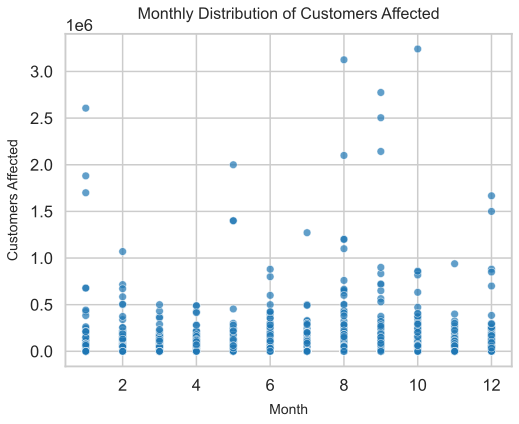

In [174]:
import seaborn as sns
sns.set_style('whitegrid')
sns.set_context('talk')  # larger fonts, suitable for presentations

# Redraw the plot with styling
plt.figure(figsize=(8, 6), dpi=100)
sns.scatterplot(data=outage, x='MONTH', y='CUSTOMERS.AFFECTED', alpha=0.7, s=60)
plt.title('Monthly Distribution of Customers Affected', fontsize=16, pad=15)
plt.xlabel('Month', fontsize=14, labelpad=10)
plt.ylabel('Customers Affected', fontsize=14, labelpad=10)


In [175]:
outage['DEMAND.LOSS.MW'] = pd.to_numeric(outage['DEMAND.LOSS.MW'], errors='coerce')
outage['OUTAGE.DURATION'] = pd.to_numeric(outage['OUTAGE.DURATION'], errors='coerce')
outage['CUSTOMERS.AFFECTED'] = pd.to_numeric(outage['CUSTOMERS.AFFECTED'], errors='coerce')

Text(0, 0.5, 'Customers Affected')

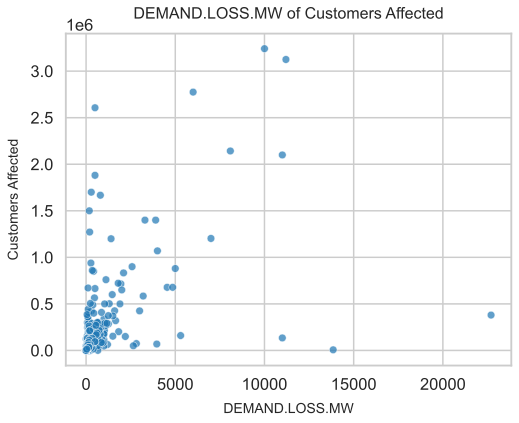

In [176]:
import seaborn as sns
sns.set_style('whitegrid')
sns.set_context('talk')  # larger fonts, suitable for presentations

# Redraw the plot with styling
plt.figure(figsize=(8, 6), dpi=100)
sns.scatterplot(data=outage, x='DEMAND.LOSS.MW', y='CUSTOMERS.AFFECTED', alpha=0.7, s=60)
plt.title('DEMAND.LOSS.MW of Customers Affected', fontsize=16, pad=15)
plt.xlabel('DEMAND.LOSS.MW', fontsize=14, labelpad=10)
plt.ylabel('Customers Affected', fontsize=14, labelpad=10)


Text(0, 0.5, 'Customers Affected')

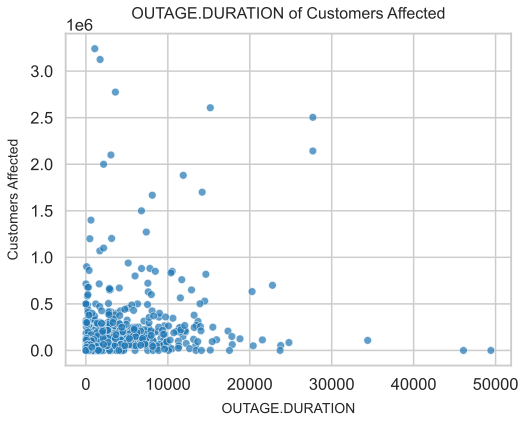

In [177]:
import seaborn as sns
sns.set_style('whitegrid')
sns.set_context('talk')  # larger fonts, suitable for presentations

# Redraw the plot with styling
plt.figure(figsize=(8, 6), dpi=100)
sns.scatterplot(data=outage, x='OUTAGE.DURATION', y='CUSTOMERS.AFFECTED', alpha=0.7, s=60)
plt.title('OUTAGE.DURATION of Customers Affected', fontsize=16, pad=15)
plt.xlabel('OUTAGE.DURATION', fontsize=14, labelpad=10)
plt.ylabel('Customers Affected', fontsize=14, labelpad=10)

Text(0, 0.5, 'Customers Affected')

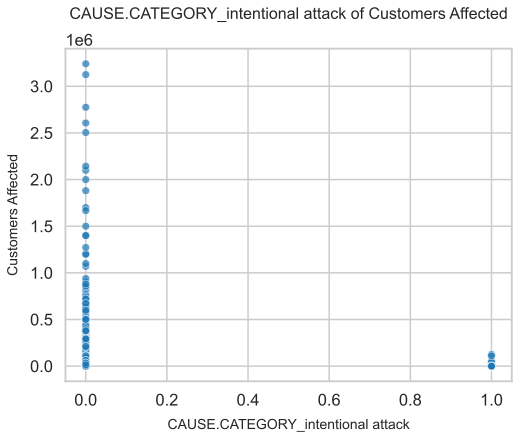

In [178]:
import seaborn as sns
sns.set_style('whitegrid')
sns.set_context('talk')  # larger fonts, suitable for presentations

# Redraw the plot with styling
plt.figure(figsize=(8, 6), dpi=100)
sns.scatterplot(data=outage_encoded, x='CAUSE.CATEGORY_intentional attack', y='CUSTOMERS.AFFECTED', alpha=0.7, s=60)
plt.title('CAUSE.CATEGORY_intentional attack of Customers Affected', fontsize=16, pad=15)
plt.xlabel('CAUSE.CATEGORY_intentional attack', fontsize=14, labelpad=10)
plt.ylabel('Customers Affected', fontsize=14, labelpad=10)

In [179]:
outage.groupby('CAUSE.CATEGORY')['CUSTOMERS.AFFECTED'].sum()

CAUSE.CATEGORY
equipment failure                3.06e+06
fuel supply emergency            1.00e+00
intentional attack               3.56e+05
islanding                        2.10e+05
public appeal                    1.60e+05
severe weather                   1.35e+08
system operability disruption    1.75e+07
Name: CUSTOMERS.AFFECTED, dtype: float64

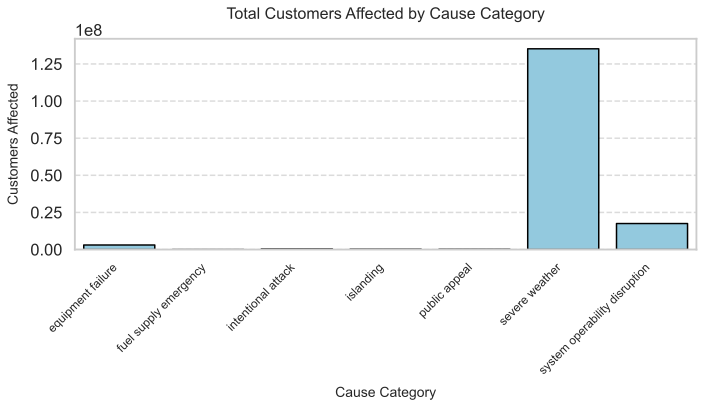

In [180]:
import seaborn as sns
import matplotlib.pyplot as plt

result = outage.groupby('CAUSE.CATEGORY')['CUSTOMERS.AFFECTED'].sum().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(data=result, x='CAUSE.CATEGORY', y='CUSTOMERS.AFFECTED', color='skyblue', edgecolor='black')

plt.title('Total Customers Affected by Cause Category', fontsize=16, pad=20)
plt.xlabel('Cause Category', fontsize=14, labelpad=10)
plt.ylabel('Customers Affected', fontsize=14, labelpad=10)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

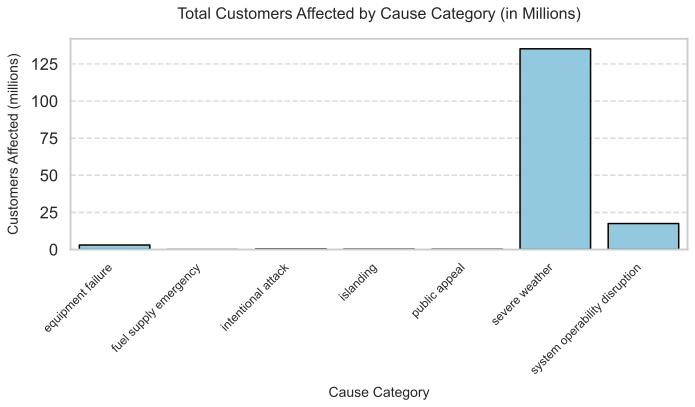

In [181]:
scaled_result = result.copy()
scaled_result['CUSTOMERS.AFFECTED'] = scaled_result['CUSTOMERS.AFFECTED']/1e6

plt.figure(figsize=(10, 6))
sns.barplot(data=scaled_result, x='CAUSE.CATEGORY', y='CUSTOMERS.AFFECTED', color='skyblue', edgecolor='black')
plt.title('Total Customers Affected by Cause Category (in Millions)', fontsize=16, pad=20)
plt.xlabel('Cause Category', fontsize=14, labelpad=10)
plt.ylabel('Customers Affected (millions)', fontsize=14, labelpad=10)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [182]:
outage_info.to_csv('outage_info.csv')

In [183]:
correlation_all = outage_encoded.corr()


In [184]:
demand_loss_corr = correlation_all['CUSTOMERS.AFFECTED']
demand_loss_corr_abs = demand_loss_corr.abs().sort_values(ascending=False)
demand_loss_corr_abs = demand_loss_corr_abs.drop('CUSTOMERS.AFFECTED',errors='ignore')
top5_vars = demand_loss_corr_abs.head(10)

# Display the top 5 variables and their correlation coefficients
print("Top 5 variables correlated with 'CUSTOMERS.AFFECTED':")
print(top5_vars)

Top 5 variables correlated with 'CUSTOMERS.AFFECTED':
DEMAND.LOSS.MW                                  0.52
OUTAGE.DURATION                                 0.26
CAUSE.CATEGORY_intentional attack               0.23
CAUSE.CATEGORY_severe weather                   0.22
YEAR                                            0.20
CAUSE.CATEGORY_islanding                        0.09
CLIMATE.REGION_Southwest                        0.08
CAUSE.CATEGORY_system operability disruption    0.07
CAUSE.CATEGORY_public appeal                    0.07
CLIMATE.REGION_West                             0.07
Name: CUSTOMERS.AFFECTED, dtype: float64


In [185]:
top5_vars = demand_loss_corr_abs.head(5)  # Use head(5) to get exactly 5

# Print the top 5 variables correlated with CUSTOMERS.AFFECTED
print("Top 5 variables correlated with 'CUSTOMERS.AFFECTED':")
print(top5_vars)

# Create a list of the selected columns
selected_columns = ['CUSTOMERS.AFFECTED'] + top5_vars.index.tolist()

# Compute the new correlation matrix for these columns
new_corr_matrix = correlation_all[selected_columns].corr()

# Display the new correlation matrix
print("\nNew Correlation Matrix:")
print(new_corr_matrix)

Top 5 variables correlated with 'CUSTOMERS.AFFECTED':
DEMAND.LOSS.MW                       0.52
OUTAGE.DURATION                      0.26
CAUSE.CATEGORY_intentional attack    0.23
CAUSE.CATEGORY_severe weather        0.22
YEAR                                 0.20
Name: CUSTOMERS.AFFECTED, dtype: float64

New Correlation Matrix:
                                   CUSTOMERS.AFFECTED  DEMAND.LOSS.MW  \
CUSTOMERS.AFFECTED                               1.00            0.77   
DEMAND.LOSS.MW                                   0.77            1.00   
OUTAGE.DURATION                                  0.44            0.12   
CAUSE.CATEGORY_intentional attack               -0.49           -0.28   
CAUSE.CATEGORY_severe weather                    0.46            0.19   
YEAR                                            -0.48           -0.24   

                                   OUTAGE.DURATION  \
CUSTOMERS.AFFECTED                            0.44   
DEMAND.LOSS.MW                                0.12

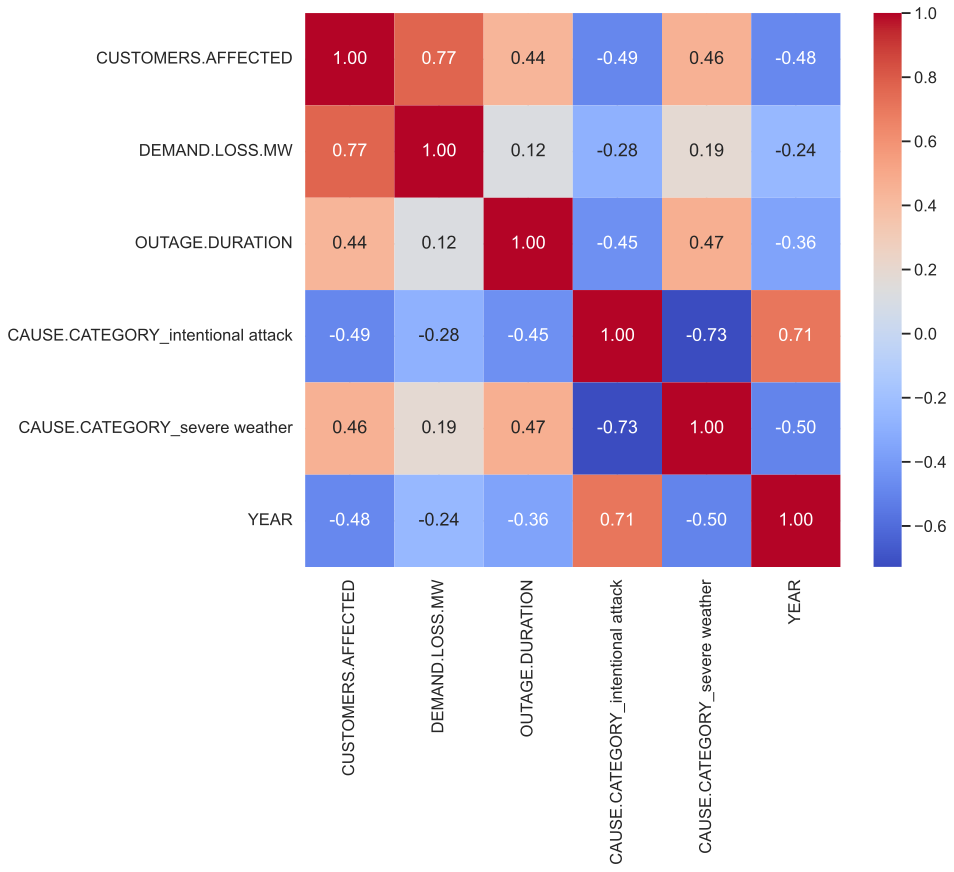

In [186]:
plt.figure(figsize=(12, 10))
sns.heatmap(new_corr_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.show()

In [187]:
outage['MONTH'].value_counts()

MONTH
6.0     195
7.0     181
8.0     153
2.0     136
1.0     136
5.0     127
4.0     111
12.0    111
10.0    109
3.0     100
9.0      94
11.0     72
Name: count, dtype: int64

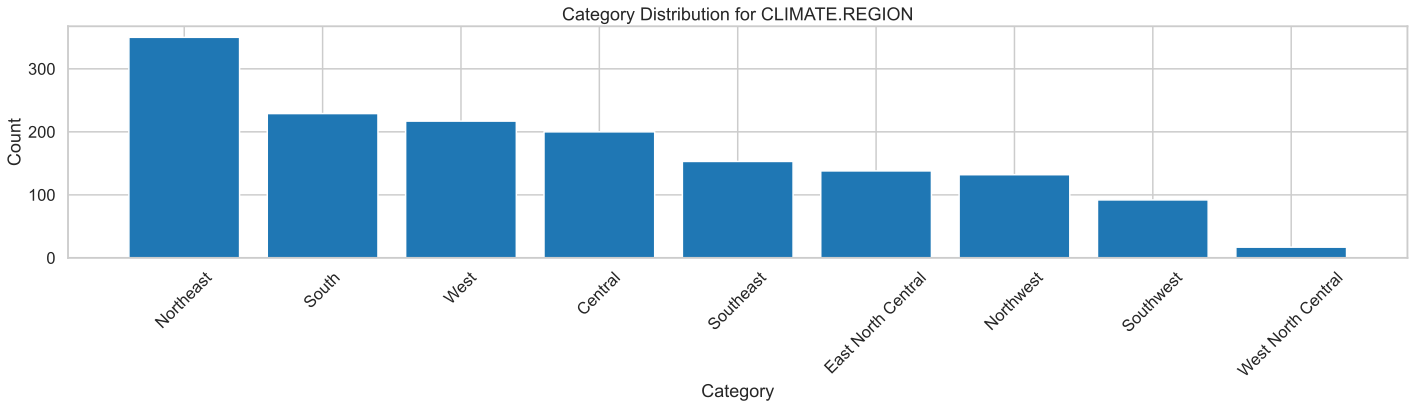

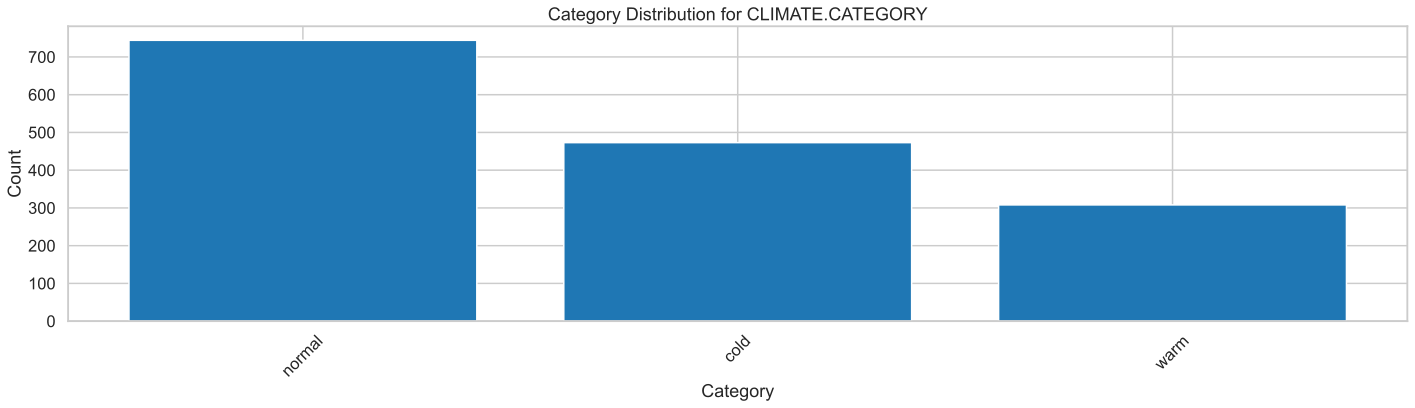

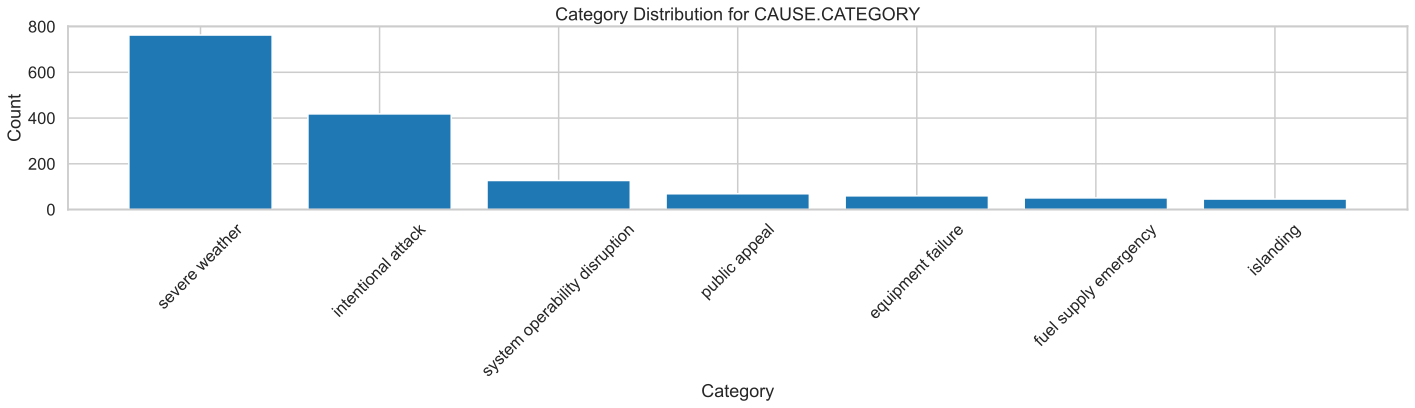

In [188]:
import pandas as pd
import matplotlib.pyplot as plt

import matplotlib.pyplot as plt

categorical_vars = ["CLIMATE.REGION", "CLIMATE.CATEGORY", "CAUSE.CATEGORY"]

for var in categorical_vars:
    counts = outage_info[var].value_counts(dropna= True)
    categories = counts.index
    values = counts.values

    plt.figure(figsize=(20, 6))
    plt.bar(categories, values)
    plt.xlabel("Category")
    plt.ylabel("Count")
    plt.title(f"Category Distribution for {var}")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()




In [189]:
categorical_vars = ["CLIMATE.REGION", "CLIMATE.CATEGORY", "CAUSE.CATEGORY"]

for var in categorical_vars:
    missing_count = outage_info[var].isna().sum()
    na_string_count = (outage_info[var] == 'nan').sum()

    print(f"{var} missing (NaN) values: {missing_count}")
    print(f"{var} 'nan' string values: {na_string_count}")
    
for var in categorical_vars:
    outage_info[var] = outage_info[var].replace('nan', np.nan)

for var in categorical_vars:
    cat_probs = outage_info[var].value_counts(normalize=True)
    
    missing_val = outage_info[var].isna()
    num_missing = missing_val.sum()
    
    if num_missing > 0 and len(cat_probs) > 0:
        imputed_values = np.random.choice(cat_probs.index, size=num_missing, p=cat_probs.values)
        outage_info.loc[missing_val, var] = imputed_values

CLIMATE.REGION missing (NaN) values: 6
CLIMATE.REGION 'nan' string values: 0
CLIMATE.CATEGORY missing (NaN) values: 9
CLIMATE.CATEGORY 'nan' string values: 0
CAUSE.CATEGORY missing (NaN) values: 0
CAUSE.CATEGORY 'nan' string values: 0


## pipeline

In [242]:
outage  = pd.read_excel("outage.xlsx",header = 5)
outage = outage.drop(columns='OBS', errors='ignore')
input = outage[['CLIMATE.REGION', 'CLIMATE.CATEGORY', 'CAUSE.CATEGORY', 'MONTH', 'YEAR', 'ANOMALY.LEVEL', 'OUTAGE.DURATION', 'DEMAND.LOSS.MW', 'CUSTOMERS.AFFECTED']]

In [243]:
train = input[input['YEAR'] < 2015]
pred = input[input['YEAR'] >= 2015]

target_col = 'OUTAGE.DURATION'

X_train = train.drop(columns=[target_col])
y_train = train[target_col]

X_pred = pred.drop(columns=[target_col])
y_pred = pred[target_col]

In [244]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import FunctionTransformer, PolynomialFeatures, OneHotEncoder
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.compose import make_column_transformer
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer


categorical_vars = ["CLIMATE.REGION", "CLIMATE.CATEGORY", "CAUSE.CATEGORY"]

existing_categorical_vars = [var for var in categorical_vars if var in X_train.columns]

cat_probs_dict = {
    var: X_train[var].replace('nan', np.nan).value_counts(normalize=True)
    for var in existing_categorical_vars
}


def impute_categorical(X):
    X = X.copy()
    for var in categorical_vars:
        X[var] = X[var].replace('nan', np.nan)
    for var, cat_probs in cat_probs_dict.items():
        missing_val = X[var].isna()
        num_missing = missing_val.sum()
        if num_missing > 0 and len(cat_probs) > 0:
            imputed_values = np.random.choice(cat_probs.index, size=num_missing, p=cat_probs.values)
            X.loc[missing_val, var] = imputed_values
    return X


X_imputed_cat = impute_categorical(X_train)
print(X_imputed_cat.isnull().sum())


CLIMATE.REGION          0
CLIMATE.CATEGORY        0
CAUSE.CATEGORY          0
MONTH                   9
YEAR                    0
ANOMALY.LEVEL           9
DEMAND.LOSS.MW        625
CUSTOMERS.AFFECTED    393
dtype: int64


In [246]:
X_train['DEMAND.LOSS.MW'] = pd.to_numeric(X_train['DEMAND.LOSS.MW'], errors='coerce')
# X_train['OUTAGE.DURATION'] = pd.to_numeric(X_train['OUTAGE.DURATION'], errors='coerce')
X_train['ANOMALY.LEVEL'] = pd.to_numeric(X_train['ANOMALY.LEVEL'], errors='coerce')

In [247]:
def impute_numerical(X):
    X = X.copy()
    numeric_cols = X.select_dtypes(include=[np.number]).columns.tolist()
    
    median_cols = [col for col in numeric_cols if col in left_skewed or col in right_skewed]
    mean_cols = [col for col in numeric_cols if col not in median_cols]

    numerical_imputer = ColumnTransformer(
        transformers=[
            ('median_imputer', SimpleImputer(strategy='median'), median_cols),
            ('mean_imputer', SimpleImputer(strategy='mean'), mean_cols)
        ],
        remainder='passthrough'
    )

    X_imputed = numerical_imputer.fit_transform(X)

    new_col_order = median_cols + mean_cols + [col for col in X.columns if col not in numeric_cols]
    X_imputed_df = pd.DataFrame(X_imputed, columns=new_col_order, index=X.index)

    return X_imputed_df
X_imputed_num = impute_numerical(X_train)
print(X_imputed_num.isnull().sum())

DEMAND.LOSS.MW        0
CUSTOMERS.AFFECTED    0
MONTH                 0
YEAR                  0
ANOMALY.LEVEL         0
CLIMATE.REGION        6
CLIMATE.CATEGORY      9
CAUSE.CATEGORY        0
dtype: int64


In [248]:
from sklearn.preprocessing import StandardScaler
from sklearn.compose import TransformedTargetRegressor
def create_pipeline(X_train, y_train):
    categorical_trans = FunctionTransformer(impute_categorical, validate=False)
    # log_transformer = FunctionTransformer(func=np.log1p, inverse_func=np.expm1, validate=False)
    categorical_trans_onehot = make_pipeline(categorical_trans,OneHotEncoder(drop = 'first',handle_unknown='ignore'))
    numeric_trans_scale = make_pipeline(FunctionTransformer(impute_numerical, validate=False),StandardScaler())
    preprocessing = make_column_transformer(
        (categorical_trans_onehot, ['CLIMATE.REGION', 'CLIMATE.CATEGORY', 'CAUSE.CATEGORY']),
        (numeric_trans_scale, ['MONTH', 'YEAR', 'ANOMALY.LEVEL', 'CUSTOMERS.AFFECTED', 'DEMAND.LOSS.MW']),
        remainder = 'drop'
    )
    # regressor = TransformedTargetRegressor(
    #     regressor=LinearRegression(),
    #     transformer=log_transformer
    # )

    pl = Pipeline([('columntransformer',preprocessing),
                     ('reg',LinearRegression())
                    ])
    pl.fit(X_train, y_train)
    return pl


not_na_mask = ~y_train.isna()
X_train_clean = X_train.loc[not_na_mask]
y_train_clean = y_train.loc[not_na_mask]


pipe = create_pipeline(X_train_clean, y_train_clean)
pipe

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline-1',
                                                  Pipeline(steps=[('functiontransformer',
                                                                   FunctionTransformer(func=<function impute_categorical at 0x141313c70>)),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore'))]),
                                                  ['CLIMATE.REGION',
                                                   'CLIMATE.CATEGORY',
                                                   'CAUSE.CATEGORY']),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('functiontransformer',
                                                                   FunctionTransformer(func=<function impute_numerical at 0x1413137f0>)),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  ['MONTH', 'YEAR',
                                                   'ANOMALY.LEVEL',
                                                   'CUSTOMERS.AFFECTED',
                                                   'DEMAND.LOSS.MW'])])),
                ('reg', LinearRegression())])

In [251]:
print("Training features:", X_train_clean.columns)
print("Testing features:", X_pred.columns)

Training features: Index(['CLIMATE.REGION', 'CLIMATE.CATEGORY', 'CAUSE.CATEGORY', 'MONTH', 'YEAR',
       'ANOMALY.LEVEL', 'DEMAND.LOSS.MW', 'CUSTOMERS.AFFECTED'],
      dtype='object')
Testing features: Index(['CLIMATE.REGION', 'CLIMATE.CATEGORY', 'CAUSE.CATEGORY', 'MONTH', 'YEAR',
       'ANOMALY.LEVEL', 'DEMAND.LOSS.MW', 'CUSTOMERS.AFFECTED'],
      dtype='object')


In [252]:
print(X_train_clean.dtypes)
print(X_pred.dtypes)

CLIMATE.REGION         object
CLIMATE.CATEGORY       object
CAUSE.CATEGORY         object
MONTH                 float64
YEAR                  float64
ANOMALY.LEVEL         float64
DEMAND.LOSS.MW        float64
CUSTOMERS.AFFECTED    float64
dtype: object
CLIMATE.REGION         object
CLIMATE.CATEGORY       object
CAUSE.CATEGORY         object
MONTH                 float64
YEAR                  float64
ANOMALY.LEVEL          object
DEMAND.LOSS.MW         object
CUSTOMERS.AFFECTED    float64
dtype: object


In [253]:
X_pred['ANOMALY.LEVEL'] = X_pred['ANOMALY.LEVEL'].astype(float)
# X_pred['OUTAGE.DURATION'] = X_pred['OUTAGE.DURATION'].astype(float)
X_pred['DEMAND.LOSS.MW'] = X_pred['DEMAND.LOSS.MW'].astype(float)

In [254]:
print(X_train_clean.dtypes)
print(X_pred.dtypes)

CLIMATE.REGION         object
CLIMATE.CATEGORY       object
CAUSE.CATEGORY         object
MONTH                 float64
YEAR                  float64
ANOMALY.LEVEL         float64
DEMAND.LOSS.MW        float64
CUSTOMERS.AFFECTED    float64
dtype: object
CLIMATE.REGION         object
CLIMATE.CATEGORY       object
CAUSE.CATEGORY         object
MONTH                 float64
YEAR                  float64
ANOMALY.LEVEL         float64
DEMAND.LOSS.MW        float64
CUSTOMERS.AFFECTED    float64
dtype: object


In [255]:
from sklearn.metrics import mean_squared_error

# Ensure test data is clean
not_na_mask_test = ~y_pred.isna()
X_test_clean = X_pred.loc[not_na_mask_test]
y_test_clean = y_pred.loc[not_na_mask_test]

# Predict using the pipeline
y_predicted = pipe.predict(X_test_clean)

# Calculate MSE
mse = mean_squared_error(y_predicted, y_test_clean)
print("Mean Squared Error:", mse)

Mean Squared Error: 14112373.889696736


In [256]:
from sklearn.metrics import r2_score
r2_score(y_test_clean, y_predicted)

0.276086924152109

In [39]:
y_test_clean

NameError: name 'y_test_clean' is not defined